In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
from glob import glob
import os
import time
import shutil

from omegaconf import OmegaConf
from collections import defaultdict, namedtuple

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

%matplotlib inline

In [3]:
plot_dir = '../exps/plots'
if os.path.exists(plot_dir):
    shutil.rmtree(plot_dir)
os.makedirs(plot_dir)

In [4]:
for d in sorted(glob('../exps/2019.09.09/*/*')):
    print('--'.join(d.split('/')[-2:]))
    cfg = OmegaConf.load(d+'/config.yaml')
    print('  + ', cfg.net['class'].split('.')[-1] + ',' + cfg.inner_optim['class'].split('.')[-1])
    fname = d+'/logs/summary_statistics.csv'
    if os.path.exists(fname):
        print('  + Last Updated:', time.ctime(os.path.getmtime(fname)))

mini_imagenet_full_size.5.1--0
  +  VGGNet,SGD
  + Last Updated: Mon Sep  9 19:25:39 2019
mini_imagenet_full_size.5.1--1
  +  VGGNet,Adam
  + Last Updated: Mon Sep  9 23:39:43 2019
mini_imagenet_full_size.5.1--2
  +  ResNet,SGD
  + Last Updated: Tue Sep 10 04:19:15 2019
mini_imagenet_full_size.5.1--3
  +  ResNet,Adam
  + Last Updated: Tue Sep 10 12:38:09 2019
mini_imagenet_full_size.5.1--4
  +  DenseNet,SGD
  + Last Updated: Tue Sep 10 20:20:38 2019
mini_imagenet_full_size.5.1--5
  +  DenseNet,Adam
  + Last Updated: Wed Sep 11 16:03:02 2019
mini_imagenet_full_size.5.5--0
  +  VGGNet,SGD
  + Last Updated: Tue Sep 10 04:31:05 2019
mini_imagenet_full_size.5.5--1
  +  VGGNet,Adam
  + Last Updated: Tue Sep 10 07:36:00 2019
mini_imagenet_full_size.5.5--2
  +  ResNet,SGD
  + Last Updated: Tue Sep 10 08:18:19 2019
mini_imagenet_full_size.5.5--3
  +  ResNet,Adam
  + Last Updated: Tue Sep 10 16:51:28 2019
mini_imagenet_full_size.5.5--4
  +  DenseNet,SGD
  + Last Updated: Tue Sep 10 18:07:45 2019

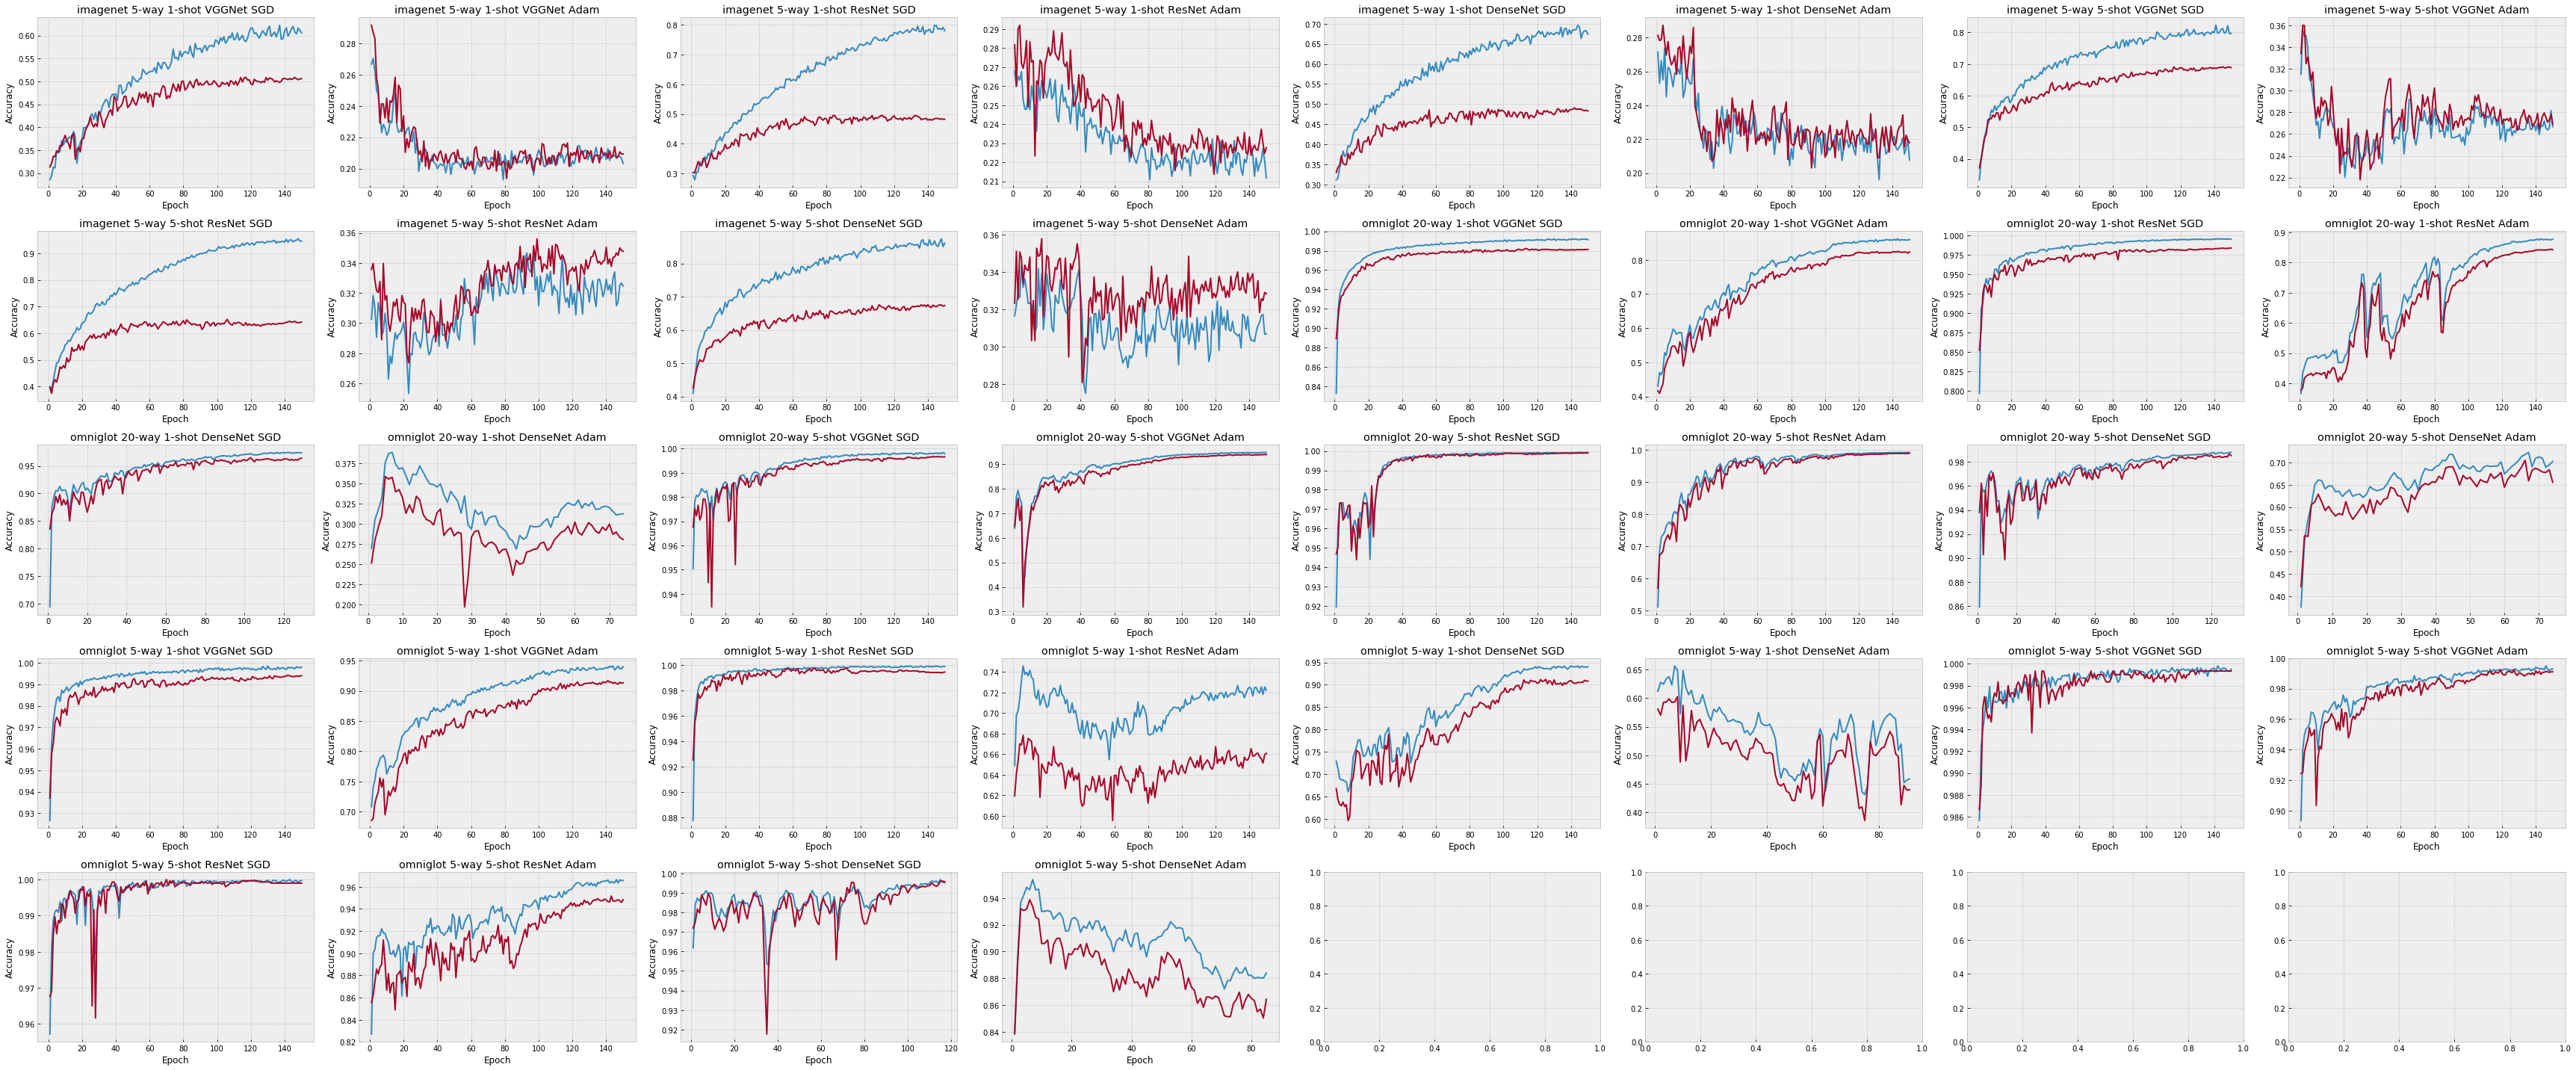

In [5]:
TestResultItem = namedtuple('TestResultItem', 'dataset nway kshot model inner_optim test_acc seed train_df cfg')
test_results = []

exps = sorted(glob('../exps/2019.09.09/*/*'))
n_exps = len(exps)
n_cols = 8
n_rows = int(np.ceil(n_exps/n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axs = axs.ravel()

for i, d in enumerate(exps):
    ax = axs[i]
    
    cfg = OmegaConf.load(d+'/config.yaml')
    fname = d+'/logs/summary_statistics.csv'
    if not os.path.exists(fname):
        continue
    df = pd.read_csv(fname)

    ax.plot(df.epoch, df.train_accuracy_mean, label='Train')
    ax.plot(df.epoch, df.val_accuracy_mean, label='Val')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
#     ax.set_ylim(0.8, 1.)

    model_name = cfg.net['class'].split('.')[-1]
    inner_optim_name = cfg.inner_optim['class'].split('.')[-1]
    dataset_name = 'imagenet' if 'imagenet' in cfg.dataset.name else 'omniglot'
    ax.set_title(f"{dataset_name} {cfg.num_classes_per_set}-way {cfg.num_samples_per_class}-shot {model_name} {inner_optim_name}")
    
    if df.epoch.values[-1] == 150:
        test_df = pd.read_csv(d+'/logs/test_summary.csv')
        test_results.append(TestResultItem(
            cfg.dataset.name,
            cfg.num_classes_per_set, cfg.num_samples_per_class, model_name,
            inner_optim_name,
            test_df.test_accuracy_mean.item(), cfg.train_seed, df, cfg
        ))
test_results = pd.DataFrame(test_results)
fig.tight_layout()
fig.savefig('t.pdf')

In [6]:
test_accs = test_results.groupby(['dataset', 'nway', 'kshot', 'model', 'inner_optim']).test_acc
test_accs.agg(['mean', 'std'])

mean  std
dataset                 nway kshot model    inner_optim               
mini_imagenet_full_size 5    1     DenseNet Adam         0.311000  NaN
                                            SGD          0.514000  NaN
                                   ResNet   Adam         0.316000  NaN
                                            SGD          0.517000  NaN
                                   VGGNet   Adam         0.327333  NaN
                                            SGD          0.543000  NaN
                             5     DenseNet Adam         0.431333  NaN
                                            SGD          0.714333  NaN
                                   ResNet   Adam         0.412333  NaN
                                            SGD          0.715667  NaN
                                   VGGNet   Adam         0.433000  NaN
                                            SGD          0.749667  NaN
omniglot_dataset        5    1     DenseNet SGD          0.941000  NaN
                                   ResNet   Adam         0.759667  NaN
                                            SGD          0.998667  NaN
                                   VGGNet   Adam         0.931000  NaN
                                            SGD          0.995000  NaN
                             5     ResNet   Adam         0.953000  NaN
                                            SGD          0.999333  NaN
                                   VGGNet   Adam         0.988667  NaN
                                            SGD          0.998000  NaN
                        20   1     ResNet   Adam         0.852250  NaN
                                            SGD          0.975250  NaN
                                   VGGNet   Adam         0.828583  NaN
                                            SGD          0.975083  NaN
                             5     ResNet   Adam         0.988333  NaN
                                            SGD          0.998000  NaN
                                   VGGNet   Adam         0.935583  NaN
                                            SGD          0.994667  NaN

In [7]:
for d in sorted(glob('../exps/2019.09.12/*/*')):
    print('--'.join(d.split('/')[-2:]))
    cfg = OmegaConf.load(d+'/config.yaml')
    print('  + ', cfg.net + ',' + cfg.inner_optim['class'].split('.')[-1])
    fname = d+'/logs/summary_statistics.csv'
    if os.path.exists(fname):
        print('  + Last Updated:', time.ctime(os.path.getmtime(fname)))

mini_imagenet_full_size.5.1--0
  +  vgg,SGD
  + Last Updated: Fri Sep 13 08:54:30 2019
mini_imagenet_full_size.5.1--1
  +  vgg,Adam
  + Last Updated: Fri Sep 13 22:33:28 2019
mini_imagenet_full_size.5.1--2
  +  resnet-4,SGD
  + Last Updated: Fri Sep 13 16:12:20 2019
mini_imagenet_full_size.5.1--2_0
  +  vgg,SGD
  + Last Updated: Sun Sep 15 15:52:37 2019
mini_imagenet_full_size.5.1--2_1
  +  vgg,Adam
  + Last Updated: Mon Sep 16 06:06:33 2019
mini_imagenet_full_size.5.1--2_10
  +  vgg,SGD
  + Last Updated: Mon Sep 16 01:18:59 2019
mini_imagenet_full_size.5.1--2_11
  +  vgg,Adam
  + Last Updated: Mon Sep 16 06:39:03 2019
mini_imagenet_full_size.5.1--2_12
  +  resnet-4,SGD
  + Last Updated: Mon Sep 16 10:16:51 2019
mini_imagenet_full_size.5.1--2_13
  +  resnet-4,Adam
  + Last Updated: Wed Sep 18 16:25:19 2019
mini_imagenet_full_size.5.1--2_14
  +  resnet-8,SGD
  + Last Updated: Tue Sep 17 09:26:09 2019
mini_imagenet_full_size.5.1--2_15
  +  resnet-8,Adam
  + Last Updated: Thu Sep 19 17:05

In [8]:
TestResultItem = namedtuple('TestResultItem', 'dataset nway kshot model inner_optim test_acc seed train_df cfg dir')
test_results = []

exps = sorted(glob('../exps/2019.09.12/*/*'))
# n_exps = len(exps)
# n_cols = 6
# n_rows = int(np.ceil(n_exps/n_cols))
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
# axs = axs.ravel()

for i, d in enumerate(exps):
#     ax = axs[i]
    
    cfg = OmegaConf.load(d+'/config.yaml')
    fname = d+'/logs/summary_statistics.csv'
    if not os.path.exists(fname):
        continue
    df = pd.read_csv(fname)

#     ax.plot(df.epoch, df.train_accuracy_mean, label='Train')
#     ax.plot(df.epoch, df.val_accuracy_mean, label='Val')
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel('Accuracy')
#     ax.set_ylim(0.8, 1.)

    model_name = cfg.net
    inner_optim_name = cfg.inner_optim['class'].split('.')[-1]
    dataset_name = 'imagenet' if 'imagenet' in cfg.dataset.name else 'omniglot'
#     ax.set_title(f"{dataset_name} {cfg.num_classes_per_set}-way {cfg.num_samples_per_class}-shot {model_name} {inner_optim_name}")
    
    if df.epoch.values[-1] == 150:
        test_df = pd.read_csv(d+'/logs/test_summary.csv')
        test_df.test_accuracy_mean *= 100.
        test_results.append(TestResultItem(
            cfg.dataset.name,
            cfg.num_classes_per_set, cfg.num_samples_per_class, model_name,
            inner_optim_name,
            test_df.test_accuracy_mean.item(), cfg.train_seed, df, cfg, d
        ))
test_results = pd.DataFrame(test_results)
# fig.tight_layout()
# fig.savefig('t.pdf')

In [33]:
I = (test_results['dataset'] == 'omniglot_dataset') & (test_results['nway'] == 20) & (test_results['kshot'] == 1)
test_results[I]

,dataset,nway,kshot,model,inner_optim,test_acc,seed,train_df,cfg,dir
55,omniglot_dataset,20,1,vgg,SGD,97.108333,0,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/0
56,omniglot_dataset,20,1,vgg,Adam,95.983333,0,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/1
57,omniglot_dataset,20,1,resnet-4,SGD,96.316667,0,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2
58,omniglot_dataset,20,1,vgg,SGD,97.325000,1,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2_0
59,omniglot_dataset,20,1,vgg,Adam,96.308333,1,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2_1
60,omniglot_dataset,20,1,vgg,SGD,97.183333,2,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2_10
61,omniglot_dataset,20,1,vgg,Adam,96.158333,2,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2_11
62,omniglot_dataset,20,1,resnet-4,SGD,96.458333,2,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2_12
63,omniglot_dataset,20,1,resnet-4,Adam,98.416667,2,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2_13
64,omniglot_dataset,20,1,resnet-8,SGD,98.325000,2,train_loss_mean train_loss_std train_ac...,"{'adam': {'class': 'torch.optim.Adam', 'params...",../exps/2019.09.12/omniglot_dataset.20.1/2_14


In [18]:
test_accs = test_results.groupby(['dataset', 'nway', 'kshot', 'model', 'inner_optim']).test_acc
test_accs_agg = test_accs.agg(['mean', 'std', 'count'])
test_accs_agg = test_accs_agg[test_accs_agg['count'] == 3]

In [19]:
t = test_accs_agg.reset_index()
I = (t.model == 'vgg') & (t['inner_optim'] == 'SGD')
t = t[I]

I = np.concatenate((np.arange(2,6), np.arange(2)))
s = []
for i, row in t.iloc[I].iterrows():
    print(f"{row['dataset']} {row['nway']} {row['kshot']}")
    s.append(f"{row['mean']:.2f} $\\pm$ {row['std']:.2f}\\%")
print(' & '.join(s))

omniglot_dataset 5 1
omniglot_dataset 5 5
omniglot_dataset 20 1
omniglot_dataset 20 5
mini_imagenet_full_size 5 1
mini_imagenet_full_size 5 5
99.62 $\pm$ 0.08\% & 99.86 $\pm$ 0.02\% & 97.21 $\pm$ 0.11\% & 99.13 $\pm$ 0.13\% & 56.33 $\pm$ 0.27\% & 75.13 $\pm$ 0.67\%


In [20]:
t = test_accs_agg.reset_index()
# I = (t.model == 'vgg') & (t['inner_optim'] == 'SGD')

_t = t.groupby(['dataset', 'nway', 'kshot'])
I = _t['mean'].transform(max) == t['mean']
t = t[I]

I = np.concatenate((np.arange(2,6), np.arange(2)))
s = []
hypers = []
for i, row in t.iloc[I].iterrows():
    print(f"{row['dataset']} {row['nway']} {row['kshot']}")
    s.append(f"{row['mean']:.2f} $\\pm$ {row['std']:.2f}\\%")
    hypers.append(f"{row['model']}+{row['inner_optim']}")
print(' & '.join(s))
print(' & '.join(hypers))

omniglot_dataset 5 1
omniglot_dataset 5 5
omniglot_dataset 20 1
omniglot_dataset 20 5
mini_imagenet_full_size 5 1
mini_imagenet_full_size 5 5
99.91 $\pm$ 0.05\% & 99.87 $\pm$ 0.03\% & 99.00 $\pm$ 0.33\% & 99.76 $\pm$ 0.01\% & 56.33 $\pm$ 0.27\% & 76.73 $\pm$ 0.52\%
resnet-4+SGD & resnet-4+SGD & resnet-12+SGD & resnet-8+SGD & vgg+SGD & resnet-8+SGD


In [24]:
print(test_accs_agg.to_latex(columns=['mean', 'std'], float_format="{:0.2f}".format))

\begin{tabular}{lllllrr}
\toprule
                 &    &   &     &     &  mean &   std \\
dataset & nway & kshot & model & inner\_optim &       &       \\
\midrule
mini\_imagenet\_full\_size & 5  & 1 & densenet-8 & SGD & 46.08 &  1.40 \\
                 &    &   & resnet-12 & SGD & 51.06 &  1.51 \\
                 &    &   & resnet-4 & Adam & 49.71 &  3.71 \\
                 &    &   &     & SGD & 54.36 &  0.23 \\
                 &    &   & resnet-8 & SGD & 54.16 &  1.35 \\
                 &    &   & vgg & Adam & 47.93 & 11.64 \\
                 &    &   &     & SGD & 56.33 &  0.27 \\
                 &    & 5 & densenet-8 & SGD & 65.29 &  0.98 \\
                 &    &   & resnet-12 & Adam & 37.40 &  3.64 \\
                 &    &   &     & SGD & 69.14 &  3.19 \\
                 &    &   & resnet-4 & Adam & 76.33 &  0.71 \\
                 &    &   &     & SGD & 74.48 &  0.77 \\
                 &    &   & resnet-8 & Adam & 68.03 & 15.19 \\
                 &    &   &     &

omniglot 20-way 1-shot resnet-4 Adam


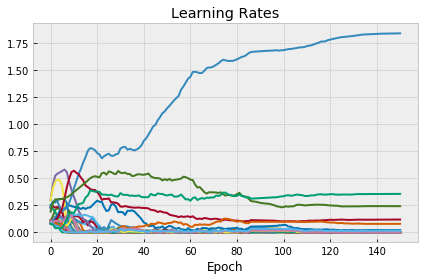

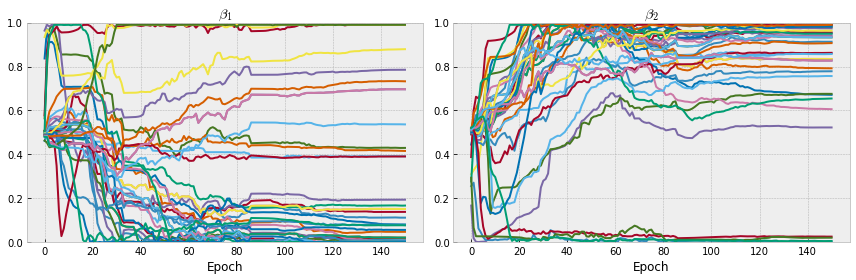

In [53]:
exp = '../exps/2019.09.12/omniglot_dataset.20.1/2_13'
cfg = OmegaConf.load(exp+'/config.yaml')
model_name = cfg.net
inner_optim_name = cfg.inner_optim['class'].split('.')[-1]
dataset_name = 'imagenet' if 'imagenet' in cfg.dataset.name else 'omniglot'
print(f"{dataset_name} {cfg.num_classes_per_set}-way {cfg.num_samples_per_class}-shot {model_name} {inner_optim_name}")


lrs = np.loadtxt(exp+'/lrs.csv', delimiter=',')
betas = np.loadtxt(exp+'/betas.csv', delimiter=',')
betas = betas.reshape(betas.shape[0], betas.shape[1]//2, 2)

ncol = 1
nrow = 1
fig, ax = plt.subplots(nrow, ncol, figsize=(6*ncol, 4*nrow))
ax.plot(lrs) #, color='k', alpha=0.3)
ax.set_title('Learning Rates')
ax.set_xlabel('Epoch')

fig.tight_layout()
fig.savefig(f'{plot_dir}/adam-lrs.pdf')

ncol = 2
nrow = 1
fig, axs = plt.subplots(nrow, ncol, figsize=(6*ncol, 4*nrow))
axs = axs.ravel()

ax = axs[0]
ax.plot(betas[:,:,0]) #, color='k', alpha=0.3)
ax.set_title('$\\beta_1$')
ax.set_xlabel('Epoch')
ax.set_ylim(0., 1.)

ax = axs[1]
ax.plot(betas[:,:,1]) #, color='k', alpha=0.3)
ax.set_title('$\\beta_2$')
ax.set_xlabel('Epoch')
ax.set_ylim(0., 1.)

fig.tight_layout()
fig.savefig(f'{plot_dir}/adam-betas.pdf')

omniglot 20-way 1-shot resnet-4 SGD


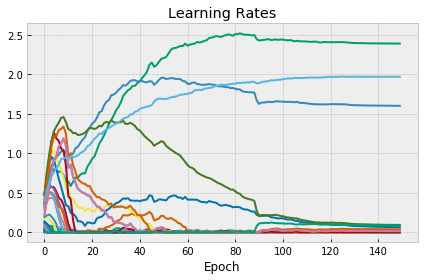

In [54]:
exp = '../exps/2019.09.12/omniglot_dataset.20.1/2_12'
cfg = OmegaConf.load(exp+'/config.yaml')
model_name = cfg.net
inner_optim_name = cfg.inner_optim['class'].split('.')[-1]
dataset_name = 'imagenet' if 'imagenet' in cfg.dataset.name else 'omniglot'
print(f"{dataset_name} {cfg.num_classes_per_set}-way {cfg.num_samples_per_class}-shot {model_name} {inner_optim_name}")

lrs = np.loadtxt(exp+'/lrs.csv', delimiter=',')

ncol = 1
fig, ax = plt.subplots(1, ncol, figsize=(6*ncol, 4))

ax.plot(lrs) #, color='k', alpha=0.3)
ax.set_title('Learning Rates')
ax.set_xlabel('Epoch')

fig.tight_layout()
fig.savefig(f'{plot_dir}/sgd-hypers.pdf')